In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
  
data = np.loadtxt('data.csv', delimiter = ',')  # 加载数据
X = data[:,:-1] # 变量
y = data[:,-1] # 值
import matplotlib.pyplot as plt 
plt.scatter(X, y, marker = '.') 
plt.show() 

<Figure size 640x480 with 1 Axes>

In [2]:
data = np.hstack((np.ones((data.shape[0], 1)), data))
print(data)
X_train = data[:, :-1] 
y_train = data[:, -1].reshape((-1, 1)) 

[[ 1.00000e+00 -7.24070e-01  2.23863e+00]
 [ 1.00000e+00 -2.40724e+00 -1.56000e-03]
 [ 1.00000e+00  2.64837e+00  3.01665e+00]
 [ 1.00000e+00  3.60920e-01  2.31019e+00]
 [ 1.00000e+00  6.73120e-01  2.05950e+00]
 [ 1.00000e+00 -4.54600e-01  1.24736e+00]
 [ 1.00000e+00  2.20168e+00  2.82497e+00]
 [ 1.00000e+00  1.15605e+00  2.21802e+00]
 [ 1.00000e+00  5.06940e-01  1.43644e+00]
 [ 1.00000e+00 -8.59520e-01  1.74980e+00]
 [ 1.00000e+00 -5.99700e-01  1.63259e+00]
 [ 1.00000e+00  1.46804e+00  2.43461e+00]
 [ 1.00000e+00 -1.05659e+00  1.02226e+00]
 [ 1.00000e+00  1.29177e+00  3.11769e+00]
 [ 1.00000e+00 -7.45650e-01  8.11940e-01]
 [ 1.00000e+00  1.50330e-01  2.81910e+00]
 [ 1.00000e+00 -1.49627e+00  5.31050e-01]
 [ 1.00000e+00 -7.20710e-01  1.64845e+00]
 [ 1.00000e+00  3.29240e-01  1.91416e+00]
 [ 1.00000e+00 -2.80530e-01  2.11376e+00]
 [ 1.00000e+00 -1.36115e+00  1.70969e+00]
 [ 1.00000e+00  7.46780e-01  2.92253e+00]
 [ 1.00000e+00  1.06210e-01  3.29827e+00]
 [ 1.00000e+00  3.25600e-02  1.585

In [23]:
def hypothesis(X, theta):
    """
    进行预测
    """
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta):
    """
    计算梯度
    """
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta):
    """
    计算错误率
    """
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size):
    """
    创建小批处理
    """
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini))
        
        if data.shape[0] % batch_size != 0: 
            mini_batch = data[i * batch_size:data.shape[0]] 
            X_mini = mini_batch[:, :-1] 
            Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
            mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
    """
    梯度下降算法
    """
    theta = np.zeros((X.shape[1], 1))    
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch
            print('X', X_mini)
            print('y', y_mini)
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

X [[ 1.00000e+00 -9.56900e-02]
 [ 1.00000e+00  2.46250e-01]
 [ 1.00000e+00 -1.05659e+00]
 [ 1.00000e+00 -2.14926e+00]
 [ 1.00000e+00 -9.54090e-01]
 [ 1.00000e+00 -8.56010e-01]
 [ 1.00000e+00  1.62780e-01]
 [ 1.00000e+00  4.95940e-01]
 [ 1.00000e+00  7.98620e-01]
 [ 1.00000e+00 -1.17110e+00]
 [ 1.00000e+00 -1.49627e+00]
 [ 1.00000e+00 -1.19662e+00]
 [ 1.00000e+00  4.65110e-01]
 [ 1.00000e+00 -7.24070e-01]
 [ 1.00000e+00 -9.31400e-02]
 [ 1.00000e+00  9.02400e-02]
 [ 1.00000e+00 -7.54630e-01]
 [ 1.00000e+00  1.11943e+00]
 [ 1.00000e+00 -3.78550e-01]
 [ 1.00000e+00 -1.79010e-01]
 [ 1.00000e+00  1.03857e+00]
 [ 1.00000e+00  1.06210e-01]
 [ 1.00000e+00  6.73120e-01]
 [ 1.00000e+00  1.15605e+00]
 [ 1.00000e+00 -1.53513e+00]
 [ 1.00000e+00  2.64837e+00]
 [ 1.00000e+00  8.95830e-01]
 [ 1.00000e+00  3.25600e-02]
 [ 1.00000e+00 -7.35910e-01]
 [ 1.00000e+00  9.90000e-04]
 [ 1.00000e+00 -3.02296e+00]
 [ 1.00000e+00  1.04694e+00]]
y [[2.81376]
 [2.33029]
 [1.02226]
 [0.62285]
 [1.86155]
 [1.12981]
 

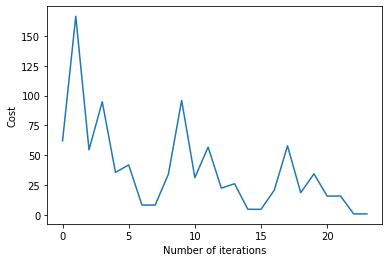

In [24]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

[[-inf]
 [ nan]]


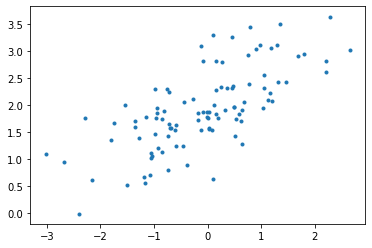

In [19]:
print(theta)
y_pred = hypothesis(X_train, theta)

plt.scatter(X, y, marker = '.') 
plt.plot(X_train[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
# error1 = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
# error2 = np.sum(np.square(y_test - y_pred) / y_test.shape[0]) * 2

# print("Mean absolute error = ", error1)
# print("Mean Squared error = ", error2) 